In [18]:
from sklearn.cluster import KMeans
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from matplotlib import pyplot as plt
%matplotlib inline

In [19]:
df = pd.read_csv('income.csv')

In [20]:
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


Text(0, 0.5, 'Income($)')

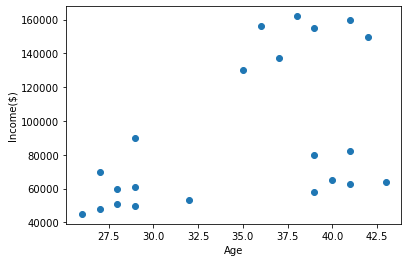

In [21]:

plt.scatter(df.Age,df['Income($)'])
plt.xlabel('Age')
plt.ylabel('Income($)')

In [22]:
km = KMeans(n_clusters=3)

# avoid name column
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([2, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1])

In [23]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,1
3,Ismail,28,60000,1
4,Kory,42,150000,0


In [24]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]

In [27]:
df.cluster==0

0     False
1     False
2     False
3     False
4      True
5      True
6      True
7      True
8      True
9      True
10     True
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
Name: cluster, dtype: bool

In [25]:
df1

,Name,Age,Income($),cluster
4,Kory,42,150000,0
5,Gautam,39,155000,0
6,David,41,160000,0
7,Andrea,38,162000,0
8,Brad,36,156000,0
9,Angelina,35,130000,0
10,Donald,37,137000,0


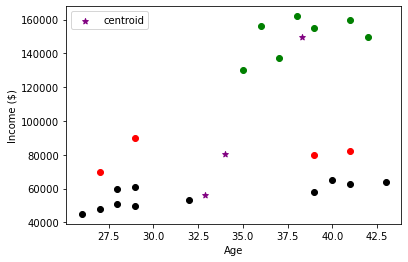

In [7]:

plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [8]:
# graph above is not scaled therefore seems incorrect

scaler = MinMaxScaler()

scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])

df

,Name,Age,Income($),cluster
0,Rob,27,0.213675,1
1,Michael,29,0.384615,1
2,Mohan,29,0.136752,2
3,Ismail,28,0.128205,2
4,Kory,42,0.897436,0
5,Gautam,39,0.940171,0
6,David,41,0.982906,0
7,Andrea,38,1.000000,0
8,Brad,36,0.948718,0
9,Angelina,35,0.726496,0


In [9]:
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,2
3,Ismail,0.117647,0.128205,2
4,Kory,0.941176,0.897436,0
5,Gautam,0.764706,0.940171,0
6,David,0.882353,0.982906,0
7,Andrea,0.705882,1.000000,0
8,Brad,0.588235,0.948718,0
9,Angelina,0.529412,0.726496,0


In [10]:
km = KMeans(n_clusters=3)

# avoid name column
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [11]:
df['cluster']=y_predicted
df.head()

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2


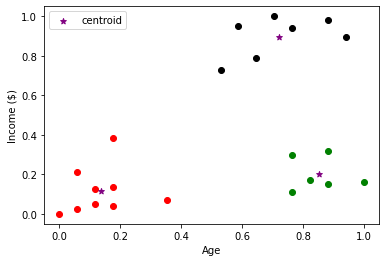

In [12]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='green')
plt.scatter(df2.Age,df2['Income($)'],color='red')
plt.scatter(df3.Age,df3['Income($)'],color='black')
# all rows and 0th col, all rows and 1st col check km.cluster_centers
#[:] all rows and columns ,0 get the 1st col of all the rows in [:]
plt.scatter(km.cluster_centers_[:,0],km.cluster_centers_[:,1],color='purple',marker='*',label='centroid')
plt.xlabel('Age')
plt.ylabel('Income ($)')
plt.legend()

In [13]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

In [14]:
#choosing best k
k_range = range(1,10)
sse =[]
for k in k_range:
    km = KMeans(n_clusters=k)
    km.fit(df[['Age', 'Income($)']])
    #get error and append
    sse.append(km.inertia_)

C:\Users\mpate\anaconda3\envs\tensorflow\lib\site-packages\sklearn\cluster\_kmeans.py:882: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  f"KMeans is known to have a memory leak on Windows "


In [15]:
# distance of all points to the cluster is sse
sse

[5.434011511988179,
 2.091136388699078,
 0.4750783498553097,
 0.3491047094419566,
 0.2766936276300279,
 0.21066678488010523,
 0.1685851223602976,
 0.13265419827245162,
 0.10188787724979426]

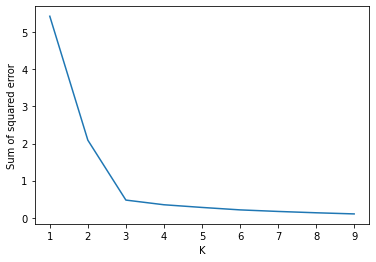

In [17]:
# look for elbow and it is on 3
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_range,sse)